<a href="https://colab.research.google.com/github/oleg-zao/My-Python-Home-Work/blob/main/Final_Project_Grocery_store_sales_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Вітаю на фінальному проєкті!
Протягом курсу ми навчились завантажувати дані в Python, трансформувати їх, чистити, агрегувати, знаходити з допомогою даних відповіді на наші питання, використовувати sql, а також Tableau!
Задача фінального проєкту - продемонструвати той рівень роботи з даними, на якому Ви є зараз, показати, що Ви вмі
те робити.

## Робота з Excel файлом
Цей ноутбук буде присвячений аналізу даних з файла `Grocery DataBase.xlsx`. Так, це Excel файл, і ми можемо дуже просто завантажувати дані з нього у Python. Покажу пару команд для роботи з Excel файлом.

Для початку встановимо бібліотеку, яка потрібна для роботи з Excel файлами з pandas. Можна встановити тут, або в терміналі, але якщо Ви встановлюєте в терміналі, то після того треба перезапустити ядро (Kernel) ноутбуку, аби бібліотека точно підтягнулась. Іноді підтягується і без того, але це на випадок, що робити, якщо компілятор каже, що її не бачить.

In [21]:
!pip install openpyxl

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# замініть на шлях до файлу на своєму комп`ютері
path_to_file = '/content/drive/My Drive/Grocery Database.xlsx'

Ось так можемо переглянути, які є листки в Excel файлі:

In [25]:
xl = pd.ExcelFile(path_to_file)
xl.sheet_names

['Grosto DB', 'Sheet2', 'Fact Summary']

А так можемо зчитати конкретний листок:

In [26]:
descr = xl.parse('Fact Summary')

In [27]:
xl.parse('Fact Summary')

,S.No.,Column Name,Description of the Column names
0,1,Receipt Number,Transaction Number
1,2,Date,Date of Transaction
2,3,Year,Year of Transaction
3,4,Month,Month of Transaction
4,5,Time,Time of the transaction
5,6,Mobile Number,Monbile number of the customer
6,7,Membership ID,Unique Membership ID of the Customer
7,8,Loyalty Card Points,Loyalty Points earned by customer (10 Points/1...
8,9,Age,Age of the Customer in the Company Database
9,10,Gender,Gender of the customer


Читати дані можна і з Pandas, але тут немає можливості переглянути наявні листки, а також довше відбувається читання даних.

In [28]:
df = pd.read_excel(path_to_file)

В файлі ви знайдете опис колонок і значення.   

**Задача**: Уявіть, що Вам дали цей набір даних з питанням "Що корисного ми можемо з них взяти для розвитку нашого бізнесу?". То Вам необхідно розказати бізнесу історію про ці дані у форматі
1. питання, яке Вас цікавить щодо цих даних як співробітника цього бізнесу, який дуже вболіває за його успіх,
2. код для відповіді на це питання
3. висновки, які Ви зробили з огляду на результат виконання коду: які рішення ми можемо прийняти щодо подальших кроків в аналізі або які рекомендації Ви б дали бізнесу виходячи з результатів.

**Необхідно**

1. поставити до даних _мінімум_ 10 бізнес-питань, при цьому зробивши   
- початковий аналіз даних: їх розмір, структура, наявність пропущених значень та що з ними зробити, зміна типів даних там, де це доречно зробити (наприклад, якщо колонка завантажилась як тип string, а з опису видно, що там має бути float - варто змінити тип) - ця частина не входить у бізнес-питання, але є необхідною при аналізі даних.  
- _мінімум_ 1 зведеної таблиці (pivot) або її аналога
- _мінімум_ 5 візуалізацій, 3 з яких мають різний тип (наприклад, scatter plot, line plot, pair plot)
- _мінімум_ 1 використання тестування статистичних гіпотез. Наприклад, порівняти, чи стат значимо відрізняється певний цікавий бізнесу показник для чоловіків і жінок. Важливо, що найбільш доречно це буде, якщо той показник, який порівнюємо між групами, справді має доволі незначну різницю. Але потренуватись можна і при наявності значної. Питання тут насправді що таке "значна")) І воно залежить від співвідношення розміру середнього і стандартного відхилення.

    В даному мінімум-наборі немає вимоги на використання SQL. Але якщо Вам хочеться потренуватись, то Ви можете це зробити скориставшись pandasql.

    Питанням може бути як "Яка є кількість унікальних чеків в цьому наборі даних?" так і щось значно складніше. Якщо у Вас складне питання, і аби відповісти на нього Ви мали відповісти на 3 менших питання (зробити якісь трансформації над даними, подивитись щось), то це рахується як 3 питання з 10 необхідних у завданні. Звісно ж Ви можете зробити більше за встановлений мінімум - все буде перевірено :)

2. Розробити систему метрик для цього бізнесу (що нам цікаво вимірювати) і побудувати Tableau репорт відповідно до системи метрик. Опублікувати Tableau репорт на Tableau public і додати посилання на нього в ноутбуці з описом на кшталт "Візуалізацію у вигляді інтерактивного репорту даних можна знайти за посиланням".

По закінченню - завантажте ноутбук на git і додаємо посилання на ноутбук в здачу роботи в Kwiga.
До речі, з часом, Вам може захотітись доповнити цей ноутбук, коли арсенал Ваших навичок по роботі з даними розшириться. І це буде чудова ідея!

**Успіхів!**

**0. Аналіз даних**

---



In [29]:
df.shape
print(f'Набір містить {df.shape[0]} рядків та {df.shape[1]} колонок.')

Набір містить 50447 рядків та 32 колонок.


In [30]:
df.head()

,Receipt Number,Date,Year,Month,Time,Mobile Number,Membership ID,Loyalty Card Points,Age,Gender,...,GST,Gross Bill Amount,Payment Mode,Bank Name,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
0,GIJ00001,2016-01-02,2016,1,10:08:03.260000,9793548581,MIDID0001,1,36,Male,...,0.1,13.32408,Card,Enterprise Bank,0.150,0.15,0.700,1.85400,1.8540,8.65200
1,GIJ00002,2016-01-02,2016,1,15:46:50.832000,9938441276,MIDID0002,2,54,Male,...,0.1,25.26480,Card,Philippine Veterans Bank,0.118,0.15,0.732,2.73760,3.4800,16.98240
2,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.147,0.15,0.703,1.95657,1.9965,9.35693
3,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,1,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.095,0.15,0.755,0.33440,0.5280,2.65760
4,GIJ00003,2016-01-02,2016,1,11:28:52.166000,9976742552,MIDID0003,2,16,Female,...,0.1,42.18786,Cash,BDO Unibank,0.120,0.15,0.730,0.52920,0.6615,3.21930


In [31]:
# типи даных кожної колонки
print(df.dtypes)

Receipt Number                 object
Date                   datetime64[ns]
Year                            int64
Month                           int64
Time                           object
Mobile Number                   int64
Membership ID                  object
Loyalty Card Points             int64
Age                             int64
Gender                         object
City                           object
Country                        object
Category                       object
Sub_Category                   object
Items                          object
Brand                          object
Description                    object
Price                         float64
QTY                             int64
DISC                          float64
Amount                        float64
Net Bill Amount               float64
GST                           float64
Gross Bill Amount             float64
Payment Mode                   object
Bank Name                      object
% Profit Mar

In [32]:
 # перевірка на пропущені значення у наборі даних
df.isna().sum()

,0
Receipt Number,0
Date,0
Year,0
Month,0
Time,0
Mobile Number,0
Membership ID,0
Loyalty Card Points,0
Age,0
Gender,0


In [33]:
# зміна кількості цифр після коми до 3
with pd.option_context('display.precision', 3):
    display(df.describe())

,Date,Year,Month,Mobile Number,Loyalty Card Points,Age,Price,QTY,DISC,Amount,Net Bill Amount,GST,Gross Bill Amount,% Profit Margin,% Operating Cost,% Product Cost,Profit Margin,Operating Cost,Product Cost
count,50447,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,50447.000,5.045e+04,50447.000,50447.000,50447.000,50447.000
mean,2018-03-01 09:42:27.410153216,2017.668,6.477,9.894e+09,18.364,35.802,7.424,1.548,0.030,11.168,66.695,0.086,72.379,0.106,1.500e-01,0.744,1.202,1.727,8.584
min,2016-01-01 00:00:00,2016.000,1.000,7.920e+09,0.000,15.000,0.840,1.000,0.010,0.798,0.978,0.060,1.037,0.051,1.500e-01,0.700,0.068,0.126,0.610
25%,2017-03-14 00:00:00,2017.000,3.000,9.839e+09,6.000,23.000,4.280,1.000,0.020,5.214,35.328,0.070,38.616,0.083,1.500e-01,0.722,0.546,0.805,4.083
50%,2018-04-02 00:00:00,2018.000,7.000,9.897e+09,14.000,35.000,5.980,2.000,0.030,8.633,58.586,0.070,63.909,0.109,1.500e-01,0.741,0.928,1.329,6.649
75%,2019-03-05 00:00:00,2019.000,10.000,9.950e+09,26.000,47.000,9.470,2.000,0.040,14.016,90.585,0.100,98.076,0.128,1.500e-01,0.767,1.505,2.178,10.829
max,2019-12-31 00:00:00,2019.000,12.000,1.000e+10,116.000,75.000,40.330,9.000,0.050,299.827,527.668,0.120,559.328,0.150,1.500e-01,0.799,26.235,46.848,239.237
std,NaN,1.112,3.454,7.636e+07,16.161,14.020,4.754,0.648,0.014,9.227,45.270,0.024,49.094,0.029,5.551e-17,0.029,1.064,1.427,7.135


In [39]:
# Перевірка на дублі
print(df.duplicated().sum())

0


**1. Які країни та міста представлені в таблиці даних та який прибуток вони дали за цей період.**

In [58]:
# Прибуток по країнам за спаданням
profit_by_country = df.groupby('Country')['Profit Margin'].sum().reset_index()
profit_by_country = profit_by_country.sort_values(by='Profit Margin', ascending=False)
print(profit_by_country)

       Country  Profit Margin
3    Singapore    22138.50881
2  Philippines    14455.63346
1     Malaysia    12958.11534
0    Indonesia    11068.59512


In [59]:
profit_by_city = df.groupby('City')['Profit Margin'].sum().reset_index()
profit_by_city = profit_by_city.sort_values(by='Profit Margin', ascending=False)
print(profit_by_city)

           City  Profit Margin
0         Bedok    14649.21073
3        Manila    14455.63346
2  Kuala Lumpur    12958.11534
1       Jakarta    11068.59512
4     Woodlands     7489.29808


In [60]:
# Поєднаємо в одну таблицю
df.groupby(['Country','City'])['Profit Margin'].sum()

Country      City        
Indonesia    Jakarta         11068.59512
Malaysia     Kuala Lumpur    12958.11534
Philippines  Manila          14455.63346
Singapore    Bedok           14649.21073
             Woodlands        7489.29808
Name: Profit Margin, dtype: float64

<Figure size 500x500 with 0 Axes>

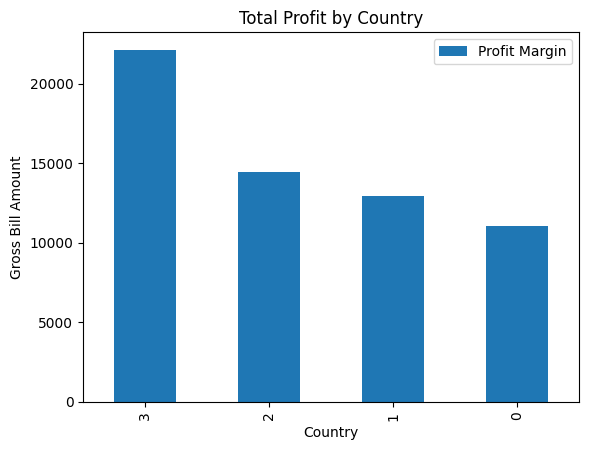

In [69]:
# Гистограмма по странам
plt.figure(figsize=(5, 5))
profit_by_country.plot(kind='bar')
plt.title('Total Profit by Country')
plt.xlabel('Country')
plt.ylabel('Gross Bill Amount')
plt.xticks(rotation=90)
plt.show()

<Figure size 500x500 with 0 Axes>

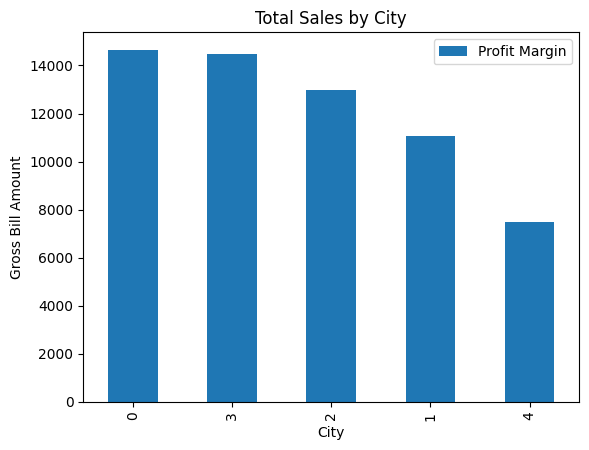

In [70]:
# Гистограмма по городам
plt.figure(figsize=(5, 5))
profit_by_city.plot(kind='bar')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Gross Bill Amount')
plt.xticks(rotation=90)
plt.show()

**2. Які категорії товарів є найпопулярнішими серед клієнтів?**

In [72]:
# Які категоріі товарів є найбільш популярними середь покупців та кількість проданих товарів?
category_qty = df.groupby('Category')['QTY'].sum().sort_values(ascending=False)
print(category_qty)

Category
Bakery & Breakfast           10526
Frozen                        9907
Beauty                        8089
Fruit & Vegetable             6815
Dairy, Chilled & Eggs         5292
Pet Care                      5272
Choco, Snacks, Sweets         4652
Kitchen & Dining              3950
Rice & Cooking Essentials     3767
Meat & Seafood                3369
Beverages                     3357
Mother & Baby                 3154
Household                     2933
Party Supplies                2824
Wines, Beers & Spirits        2656
Health                        1537
Name: QTY, dtype: int64


In [75]:
# Группировка данных по категориям и суммирование выручки
category_revenue = df.groupby('Category')['Gross Bill Amount'].sum().sort_values(ascending=False)
print(category_revenue)

Category
Frozen                       511380.728914
Bakery & Breakfast           470220.885862
Beauty                       420275.632806
Fruit & Vegetable            329381.255292
Dairy, Chilled & Eggs        209814.218206
Pet Care                     206342.692481
Choco, Snacks, Sweets        186693.237290
Meat & Seafood               180059.122019
Kitchen & Dining             179890.701549
Mother & Baby                170227.049496
Beverages                    167655.340481
Rice & Cooking Essentials    167287.051302
Household                    147489.839124
Party Supplies               116204.002254
Wines, Beers & Spirits       101734.735554
Health                        86634.253320
Name: Gross Bill Amount, dtype: float64


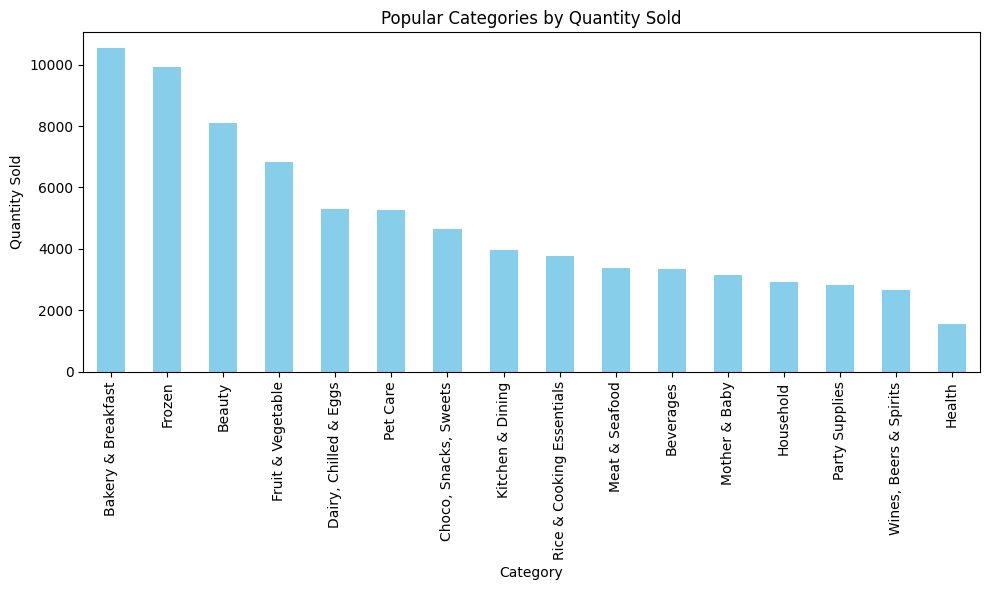

In [81]:
plt.figure(figsize=(10, 6))
category_qty.plot(kind='bar', color='skyblue')
plt.title('Popular Categories by Quantity Sold')
plt.xlabel('Category')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**3. Динаміка прибутку по роках по містах та країнах**

In [88]:
profit_margin_pivot = df.pivot_table(index = 'Year', columns = 'Country', values = 'Profit Margin', aggfunc = 'sum')
profit_margin_pivot

Country,Indonesia,Malaysia,Philippines,Singapore
Year,,,,
2016,2395.58095,2558.09853,2621.04384,4745.95328
2017,2600.09893,2863.73544,3221.41375,5034.04354
2018,2812.78110,3400.27354,3852.59818,5724.53548
2019,3260.13414,4136.00783,4760.57769,6633.97651


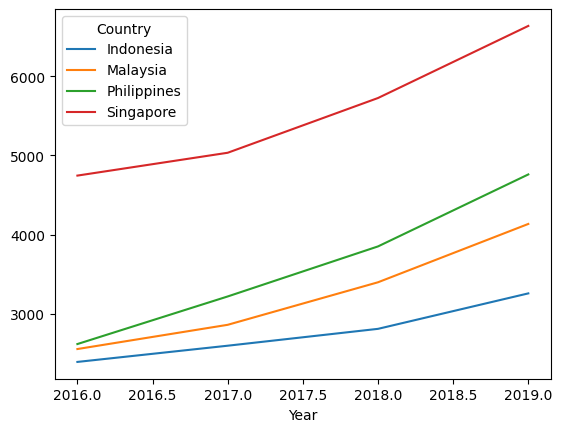

In [89]:
profit_margin_pivot.plot();

In [86]:
profit_margin_pivot = df.pivot_table(index = 'Year', columns = 'City', values = 'Profit Margin', aggfunc = 'sum')
profit_margin_pivot

City,Bedok,Jakarta,Kuala Lumpur,Manila,Woodlands
Year,,,,,
2016,3157.88335,2395.58095,2558.09853,2621.04384,1588.06993
2017,3347.15038,2600.09893,2863.73544,3221.41375,1686.89316
2018,3773.16340,2812.78110,3400.27354,3852.59818,1951.37208
2019,4371.01360,3260.13414,4136.00783,4760.57769,2262.96291


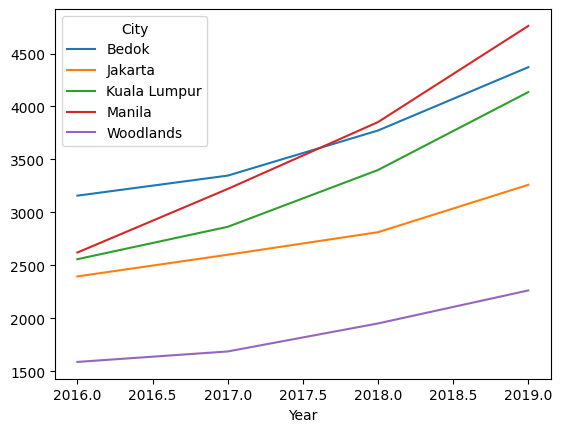

In [87]:
profit_margin_pivot.plot();